   MUSIC STREAMING ANALYSIS
Most Streamed On Spotify 2000-2023




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression


In [ ]:
data = pd.read_csv("coded Data set - top music 2023.xlsx - Data set - top music 2023 (1).csv")
print(data.head())
print(data.info())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day       Date  Day_coded  \
0           2023               7            14  7/14/2023        3.0   
1           2023               3            23  3/23/2023        4.0   
2           2023               6            30  6/30/2023        4.0   
3           2019               8            23  8/23/2019        3.0   
4           2023               5            18  5/18/2023        3.0   

        Day  in_spotify_playlists  ...  in_shazam_charts  bpm danceability_%  \
0    Friday                   553  ...    

In [ ]:
data.describe()

,artist_count,released_year,released_month,released_day,Day_coded,in_spotify_playlists,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,899.000000,899.000000,899.000000,899.000000,898.000000,899.000000,899.000000,8.990000e+02,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,1.566185,2020.488320,6.058954,14.208009,3.315145,4667.756396,12.482759,5.022896e+08,52.112347,2.781980,122.652948,67.413793,51.047831,64.552836,26.527253,1.560623,18.165740,10.410456
std,0.900885,3.804321,3.494487,9.071487,1.319527,7087.641218,19.891926,5.650687e+08,50.553723,6.180945,27.975206,14.333604,23.221864,16.226825,25.581001,8.421090,13.654189,10.077514
min,1.000000,2000.000000,1.000000,1.000000,0.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,65.000000,25.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,6.000000,3.000000,855.500000,0.000000,1.399200e+08,7.000000,0.000000,100.000000,58.000000,32.500000,54.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,4.000000,2094.000000,4.000000,2.833323e+08,39.000000,0.000000,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4.000000,4983.000000,17.000000,6.411495e+08,87.000000,2.000000,140.000000,78.000000,69.000000,77.000000,42.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,6.000000,52898.000000,147.000000,3.703895e+09,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
data = data.drop(columns=["in_shazam_charts"])
duplicates = data.duplicated().sum()
print(duplicates)
data["Date"] = pd.to_datetime(data["Date"],errors="coerce")
print(data["Date"].dtype)

0
datetime64[ns]


In [ ]:
#1 Identify the most common features for  trending songs
threshold = data['streams'].quantile(0.90)
trending_songs = data[data['streams'] > threshold]

# Avg of features for trending songs
avg_trending_features = trending_songs[['danceability_%', 'energy_%', 'valence_%']].mean()

print(trending_songs[['track_name', 'artist(s)_name']])
print(avg_trending_features)

                                        track_name         artist(s)_name
12                                         Flowers            Miley Cyrus
14                                       As It Was           Harry Styles
22                                I Wanna Be Yours         Arctic Monkeys
37                                     Blank Space           Taylor Swift
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee
..                                             ...                    ...
710                There's Nothing Holdin' Me Back           Shawn Mendes
717                                     Photograph             Ed Sheeran
718                                  Love Yourself          Justin Bieber
746                                       Callaita       Bad Bunny, Tainy
862                                  The Scientist               Coldplay

[90 rows x 2 columns]
danceability_%    64.466667
energy_%          64.177778
valence_%         50.688889
dtype

In [ ]:
#2 What are the top 25 most-streamed songs, and what common features do they share (e.g., high danceability, energy, or presence in playlists)?
top25ongs = data.sort_values(by='streams', ascending=False).head(25)
print(top25ongs[['track_name', 'artist(s)_name', 'danceability_%', 'energy_%', 'in_spotify_playlists', 'in_apple_playlists','in_deezer_playlists']])

# Average features of these top songs
top_features = top25ongs[['danceability_%', 'energy_%' , 'valence_%']].mean()
print("Common Features:", top_features)


                                        track_name  \
55                                 Blinding Lights   
175                                   Shape of You   
84                               Someone You Loved   
585                                   Dance Monkey   
41   Sunflower - Spider-Man: Into the Spider-Verse   
159                                      One Dance   
82                       STAY (with Justin Bieber)   
137                                       Believer   
682                                         Closer   
48                                         Starboy   
135                                        Perfect   
70                                      Heat Waves   
14                                       As It Was   
652                                       Señorita   
315                           Say You Won't Let Go   
125                           lovely - Bonus Track   
124                               Watermelon Sugar   
398                         

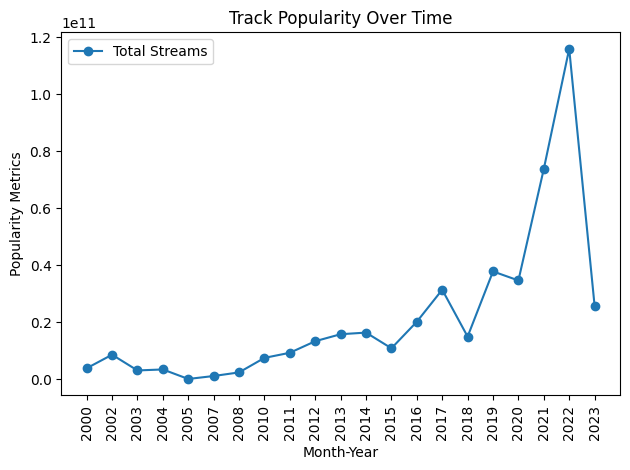

In [ ]:
#3 Track popularity of top 10 songs over time by analyzing streams across different years.
top_10_songs = data.sort_values(by='streams',ascending = False).head(10)
top_10_songs['released_date'] = pd.to_datetime(top_10_songs['Date'])
top_10_songs['released_year'] = data['Date'].dt.year
top_10_songs['released_month'] = data['Date'].dt.to_period('M')
#  Aggregate data for streams and playlist presence
popularity_over_time = data.groupby('released_year').agg({
    'streams': 'sum'
}).reset_index()
#plotting
plt.plot(popularity_over_time['released_year'].astype(str),
         popularity_over_time['streams'], label='Total Streams', marker='o')
plt.xticks(rotation=90)
plt.title('Track Popularity Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Popularity Metrics')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#4 Most featured artists by artist_count, along with their total streams. Track artists with the highest presence in playlists
Most_featured = data.groupby('artist(s)_name').agg({
    'artist_count': 'sum',
    'streams': 'sum',
    'in_spotify_playlists': 'sum',
    'in_apple_playlists' :  'sum',
    'in_deezer_playlists': 'sum'
}).sort_values(by='artist_count', ascending=False).head(10)

print(Most_featured)

                                                    artist_count      streams  \
artist(s)_name                                                                  
Taylor Swift                                                  33  13931786430   
The Weeknd                                                    22  14185552870   
Bad Bunny                                                     19   9997799607   
SZA                                                           19   4557811204   
Harry Styles                                                  17  11608645649   
Drake, 21 Savage                                              16   2076567740   
Kendrick Lamar                                                12   3033135947   
Morgan Wallen                                                 11   1666199217   
Ed Sheeran                                                     9  13908947204   
Big One, Duki, Lit Killah, Maria Becerra, FMK, ...             8    123122413   

                           

Streams for Collaborations vs. Solo Releases:
   artist_count       streams           type
0         False  5.540728e+08           Solo
1          True  4.221944e+08  Collaboration


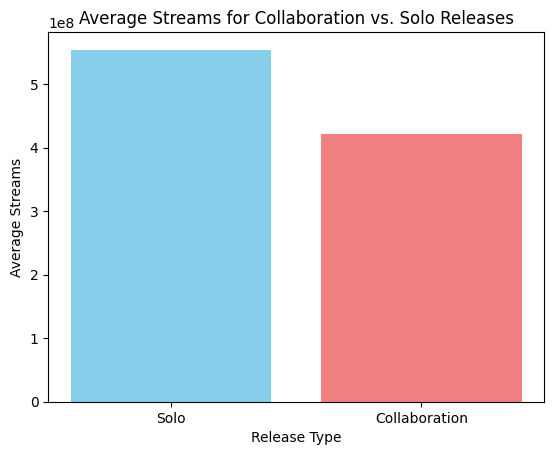

In [ ]:
#5For multi-artist songs, do collaborations yield higher streams or chart presence compared to solo releases?
data['artist_count'] = data['artist(s)_name'].apply(lambda x: ',' in x)
collab_stats = data.groupby('artist_count')['streams'].mean().reset_index()
collab_stats['type'] = collab_stats['artist_count'].map({True: 'Collaboration', False: 'Solo'})
#plotting
print("Streams for Collaborations vs. Solo Releases:")
print(collab_stats)
plt.bar(collab_stats['type'], collab_stats['streams'], color=['skyblue', 'lightcoral'])
plt.title('Average Streams for Collaboration vs. Solo Releases')
plt.xlabel('Release Type')
plt.ylabel('Average Streams')
plt.show()

Average Streams for Weekend vs. Weekday Releases:
   is_weekend       streams     type
0       False  4.902294e+08  Weekday
1        True  7.028202e+08  Weekend
Performance of Songs Released on Weekdays vs Weekends:


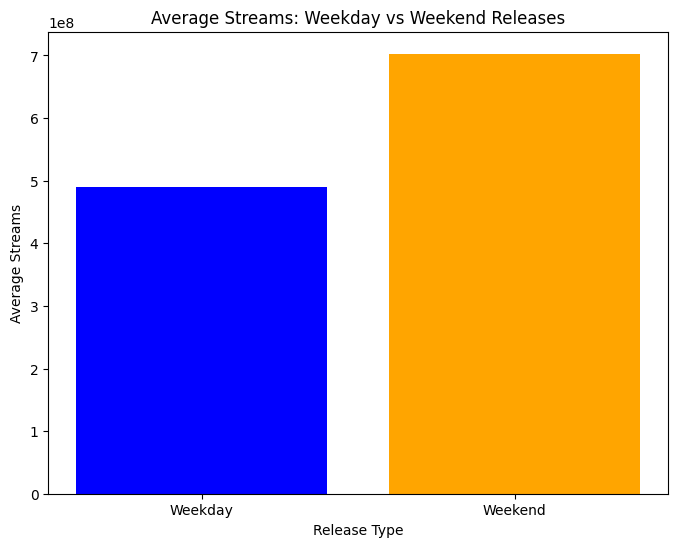

In [ ]:
#6 pattern in streaming counts for songs released close to weekends compared to weekday
data['release_day'] = data['Date'].dt.dayofweek
data['is_weekend'] = data['release_day'].apply(lambda x: x >= 5)  # Saturday=5, Sunday=6

weekend_stats = data.groupby('is_weekend')['streams'].mean().reset_index()
weekend_stats['type'] = weekend_stats['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

print("Average Streams for Weekend vs. Weekday Releases:")
print(weekend_stats)
 # Define weekdays and weekends
weekend_days = ['Saturday', 'Sunday']
data['release_type'] = data['Day'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')
# Print the results
print("Performance of Songs Released on Weekdays vs Weekends:")

# Plot
plt.figure(figsize=(8, 6))
plt.bar(release_performance['release_type'],release_performance['Average Streams'], color=['blue', 'orange'])
plt.title('Average Streams: Weekday vs Weekend Releases')
plt.ylabel('Average Streams')
plt.xlabel('Release Type')
plt.show()



In [ ]:
#7 model to predict the likelihood of a song reaching a high chart position based on its audio features and playlist presence
features = ['danceability_%', 'energy_%', 'valence_%', 'streams']
X = data[features]
y = (data['in_spotify_charts'] > 0).astype(int)  # Binary target: chart presence or not

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.2f}")


features = ['danceability_%', 'energy_%', 'valence_%', 'streams']
X = data[features]
y = (data['in_apple_charts'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.2f}")

features = ['danceability_%', 'energy_%', 'valence_%', 'streams']
X = data[features]
y = (data['in_deezer_charts'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.2f}")

Prediction Accuracy: 0.61
Prediction Accuracy: 0.90
Prediction Accuracy: 0.42


In [ ]:
#8 build a logistic regression model for  predicting the future chance of the current  top 10 songs to be  present in the spotify, apply and deezer charts

def predict_chart_presence(data, chart_column):
    """
    Builds and evaluates a logistic regression model for predicting the presence of songs in a specified chart.

    Args:
        data: The DataFrame containing song data.
        chart_column: The name of the column indicating presence in the target chart (e.g., 'in_spotify_charts').

    Returns:
        A tuple containing the trained model and its accuracy score.
    """
    features = ['danceability_%', 'energy_%', 'valence_%', 'streams']
    X = data[features]
    y = (data[chart_column] > 0).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return model, accuracy

# Predict for Spotify charts
spotify_model, spotify_accuracy = predict_chart_presence(data, 'in_spotify_charts')
print(f"Spotify Chart Prediction Accuracy: {spotify_accuracy:.2f}")

# Predict for Apple Music charts
apple_model, apple_accuracy = predict_chart_presence(data, 'in_apple_charts')
print(f"Apple Music Chart Prediction Accuracy: {apple_accuracy:.2f}")

# Predict for Deezer charts
deezer_model, deezer_accuracy = predict_chart_presence(data, 'in_deezer_charts')
print(f"Deezer Chart Prediction Accuracy: {deezer_accuracy:.2f}")

# Get the top 5 songs
top_5 = data.nlargest(5, 'streams')

# Function to predict probability for a single song
def predict_single_song(model, song_data):
    return model.predict_proba(song_data)[0,1] # Probability of being in chart

# Predictions for top 5 songs
for index, row in top_5.iterrows():
    song_features = row[['danceability_%', 'energy_%', 'valence_%', 'streams']].values.reshape(1,-1)

    spotify_prob = predict_single_song(spotify_model, song_features)
    apple_prob = predict_single_song(apple_model, song_features)
    deezer_prob = predict_single_song(deezer_model, song_features)

    print(f"Song: {row['track_name']} by {row['artist(s)_name']}")
    print(f"  Spotify Chart Probability: {spotify_prob:.2f}")
    print(f"  Apple Music Chart Probability: {apple_prob:.2f}")
    print(f"  Deezer Chart Probability: {deezer_prob:.2f}")
    print("-" * 20)

Spotify Chart Prediction Accuracy: 0.61
Apple Music Chart Prediction Accuracy: 0.90
Deezer Chart Prediction Accuracy: 0.42
Song: Blinding Lights by The Weeknd
  Spotify Chart Probability: 0.97
  Apple Music Chart Probability: 0.98
  Deezer Chart Probability: 0.62
--------------------
Song: Shape of You by Ed Sheeran
  Spotify Chart Probability: 0.96
  Apple Music Chart Probability: 0.99
  Deezer Chart Probability: 0.62
--------------------
Song: Someone You Loved by Lewis Capaldi
  Spotify Chart Probability: 0.94
  Apple Music Chart Probability: 0.95
  Deezer Chart Probability: 0.59
--------------------
Song: Dance Monkey by Tones and I
  Spotify Chart Probability: 0.94
  Apple Music Chart Probability: 0.97
  Deezer Chart Probability: 0.59
--------------------
Song: Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee
  Spotify Chart Probability: 0.93
  Apple Music Chart Probability: 0.98
  Deezer Chart Probability: 0.59
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid